In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KernelDensity
from matplotlib.ticker import PercentFormatter

In [3]:
tup_num = 25
e_b = np.linspace(0, 0.7, tup_num)
a_p = np.linspace(1, 5, tup_num)

Np = 15

Qex = []
for x in range(4,7):
    Q = 10**x
    Qex.append(Q)

tup_list = []

for Q in Qex:
    for e in e_b:
        for a in a_p:
            tup_list.append((Q,e,a,Np))

Nq = len(Qex)
Ne = len(e_b)
Na = len(a_p)

In [3]:
#x = np.loadtxt("/cita/d/homes/home-2/ksmith/CTA_HW/raw_data_storage/SUNNY_raw_survival_time.npy")
# SUNNY_raw_survival_time_eb0.35_ap2.6666666666666665.npy

raw_surv = []

for num in range(tup_num*Np):
    x = np.loadtxt(f"/mnt/raid-cita/ksmith/CSTE_SUNNY/SUNNY_raw_survival_time_eb{tup_list[num][1]}_ap{tup_list[num][2]}.npy")
    raw_surv.extend(x)
    
#print(len(raw_surv))
    #print(len(x), x)
# this data set will be "x"

In [4]:
print(np.shape(raw_surv))
print(raw_surv[0])

(5625,)
634.6651825433926


<AxesSubplot:title={'center':'Marginal Distribution of Survival Times'}, xlabel='Survival Times', ylabel='Frequency'>

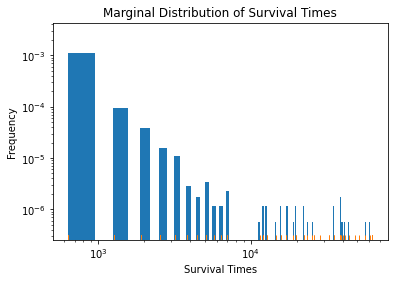

In [76]:
plt.hist(raw_surv, density=True, stacked=True, bins=200)
plt.yscale("log")
plt.xscale("log")

plt.xlabel("Survival Times")
plt.ylabel("Frequency")
plt.title("Marginal Distribution of Survival Times")

# add blue line showing the kernel density estimate (see density function help file to read details)
#np.histogram()
#lines(density(x), col="blue")

# add the actual data points along the bottom of the plot
sns.rugplot(raw_surv)

#kernal_data = np.array(raw_surv).reshape(-1,1)
#kde = KernelDensity(kernel='gaussian', bandwidth=0.75).fit(kernal_data) #not sure what bandwidth does
#log_dens = kde.score_samples(kernal_data)

#rug(x)

In [125]:
# critcal semi-major axis equation, blue cruve from colourmap

# try to incorporate these critical semi-major axis values when choosing which files to plot in histograms for the 
#     vertical slicing where we hold e constant while 
a_c = 1.6 + 5.1*e_b + (- 2.22*(e_b**2)) + 4.12*0.5 + (- 4.27*e_b*0.5) + (- 5.09*(0.5**2)) + 4.61*(e_b**2)*(0.5**2)
print(a_c)
print(a_p)
# can look w/in this range of a_p and a maybe the whole range of e_b or change the range for each verical row of a_p 
# to avoid plotting lots of histograms with full survival times

[2.3875     2.47307105 2.55682587 2.63876445 2.71888681 2.79719293
 2.87368281 2.94835647 3.02121389 3.09225508 3.16148003 3.22888876
 3.29448125 3.35825751 3.42021753 3.48036133 3.53868889 3.59520022
 3.64989531 3.70277418 3.75383681 3.8030832  3.85051337 3.8961273
 3.939925  ]
[1.         1.16666667 1.33333333 1.5        1.66666667 1.83333333
 2.         2.16666667 2.33333333 2.5        2.66666667 2.83333333
 3.         3.16666667 3.33333333 3.5        3.66666667 3.83333333
 4.         4.16666667 4.33333333 4.5        4.66666667 4.83333333
 5.        ]


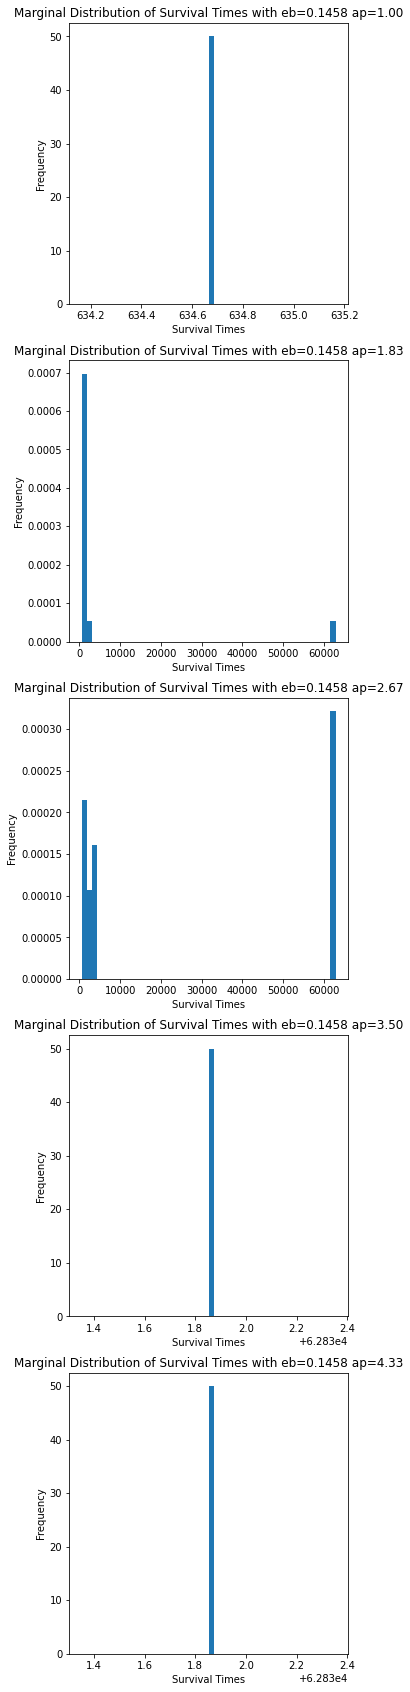

In [155]:
"""Colour Map Vertical Slicing"""

fig, ax = plt.subplots(5, 1, figsize=(5,30)) # sharex=True
# try a while loop for a_p to restrict it to being within the range of the critical semi-major axis a_c

for num, a in enumerate(a_p[::5]):
    bin_ecc = e_b[5]
    x = np.loadtxt(f"/mnt/raid-cita/ksmith/CSTE_SUNNY/SUNNY_raw_survival_time_eb{bin_ecc}_ap{a}.npy")
        
    ax[num].hist(x, density=True, stacked=True, bins=50)
    #ax[num].set_xlim([634.64,634.7])
    #set x axis to be the same, share x axis 
    #ax[num].set_yscale("log")
    #ax[num].set_xscale("log")
    ax[num].set_xlabel("Survival Times")
    ax[num].set_ylabel("Frequency")
    ax[num].set_title(r"Marginal Distribution of Survival Times with eb={:.4f} ap={:.2f}".format(bin_ecc,a))

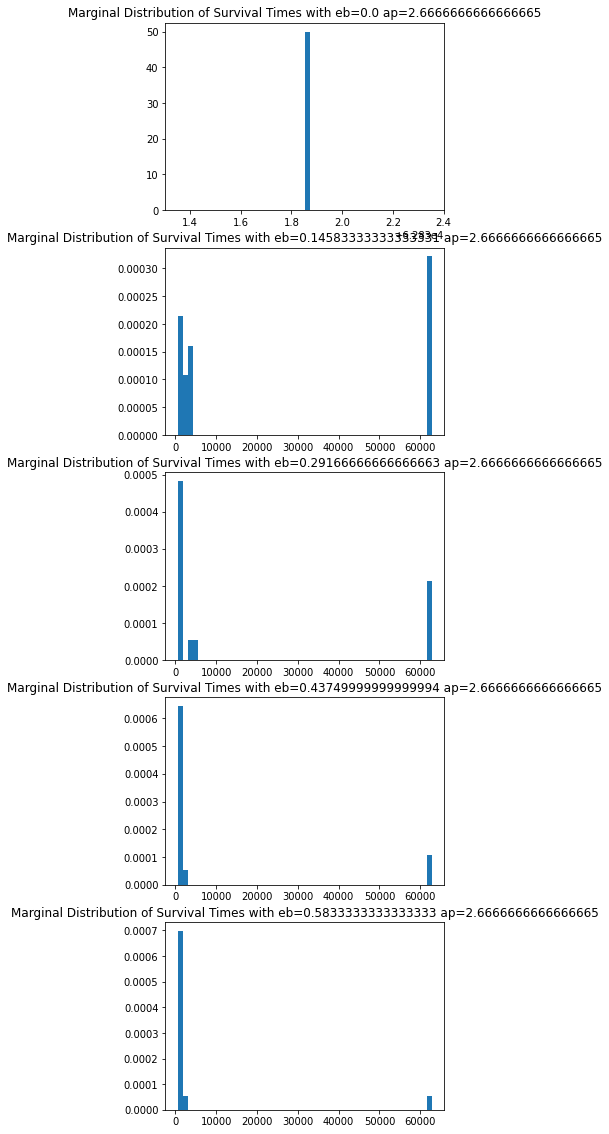

In [149]:
"""Colour Map Horizontal Slicing"""

fig, ax = plt.subplots(5, 1, figsize=(5,20)) # sharex=True

for num, e in enumerate(e_b[::5]):
    #for e in e_b[::5]:
    plan_semi = a_p[10]
    x = np.loadtxt(f"/mnt/raid-cita/ksmith/CSTE_SUNNY/SUNNY_raw_survival_time_eb{e}_ap{plan_semi}.npy")
        
    ax[num].hist(x, density=True, stacked=True, bins=50)
    #ax[num].set_xlim([634.64,634.7])
        # set x axis to be the same, share x axis 
    #ax[num].set_yscale("log")
        #ax[num].set_xscale("log")
        #ax[num].set_xlabel("Survival Times")
        #ax[num].set_ylabel("Frequency")
    ax[num].set_title(f"Marginal Distribution of Survival Times with eb={e} ap={plan_semi}")

In [9]:
for a in reversed(a_p):
    print(a)

5.0
4.833333333333333
4.666666666666666
4.5
4.333333333333333
4.166666666666666
4.0
3.833333333333333
3.6666666666666665
3.5
3.333333333333333
3.1666666666666665
3.0
2.833333333333333
2.6666666666666665
2.5
2.333333333333333
2.1666666666666665
2.0
1.8333333333333333
1.6666666666666665
1.5
1.3333333333333333
1.1666666666666667
1.0


In [5]:
print(a_p)

[1.         1.16666667 1.33333333 1.5        1.66666667 1.83333333
 2.         2.16666667 2.33333333 2.5        2.66666667 2.83333333
 3.         3.16666667 3.33333333 3.5        3.66666667 3.83333333
 4.         4.16666667 4.33333333 4.5        4.66666667 4.83333333
 5.        ]


### Inner Most Stable Orbits

In [ ]:
# turn this into a function at some point
a_stable = []
e_stable = []
full_sim = 62831.853071795864

for e in e_b:
    for a in reversed(a_p):
        x = np.loadtxt(f"/mnt/raid-cita/ksmith/CSTE_SUNNY/SUNNY_raw_survival_time_eb{e}_ap{a}.npy")
        for num in x:
            if num // full_sim == False:
                a_p
                e_b
            

        # use the raw surv times files to find the first 
        # file vertically along the ap axis of the colormap where the survival times is less than 62831.853071795864 
# shown below

In [29]:
test = np.loadtxt(f"/mnt/raid-cita/ksmith/CSTE_SUNNY/SUNNY_raw_survival_time_eb{e_b[5]}_ap{a_p[-1]}.npy")

for num in test:
    print(num // 62831.853071795864 == 1)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
